Dataset: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(font_scale=0.5)


pd.options.display.max_columns = 150

df = pd.read_csv('data/mental.csv')

In [164]:
new_column_names = ['is_self_employed', 'employee_count_bracket', 'is_tech_org', 'role_is_IT', 'empl_provides_mh_cov', 'knows_mh_cov_options',
                    'empl_discussed_mh','empl_offers_mh_rsrcs','anon_protec','if_askfor_mh_medical_leave_how_easy', 'discuss_mh_with_empl_wouldcause_neg_conseq', 'discuss_ph_with_empl_wouldcause_neg_conseq',
                    'comfy_discussing_mh_with_coworkers','comfy_discussing_mh_with_supervisors' , 'empl_takes_mh_asseriously_as_ph', 'observed_neg_conseq_for_coworkers_openabout_mh_inworkspace',
                    'has_medical_cov_incl_mh', 'knowsof_mh_resources','if_diag_would_reveal_toclients/bn_contacts', 'if_reveal_diag_toclient_didthis_impact_neg', 'if_diag_would_reveal_tocoworkers/employees',
                    'if_reveal_diag_tocoworker_didthis_impact_neg', 'productivity_isaffected_by_mh', 'percentage_worktime_affected_by_mh', 'has_prev_employers','prev_empl_provided_mh_benefits',
                    'was_aware_of_prevemployers_mhcare_options','prev_empl_discussed_mh', 'prev_empl_provided_mh_rsrc', 'prev_anon_protec', 'prev_discuss_mh_with_empl_wouldcause_neg_conseq',
                    'prev_discuss_ph_with_empl_wouldcause_neg_conseq', 'prev_wouldhavebeen_willing_discuss_mh_coworkers', 'prev_wouldhavebeen_willing_discuss_mh_supervisors',
                    'prev_empl_takes_mh_asseriously_as_ph', 'prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace', 'willingto_bringup_ph_interview', 'why', 'willingto_bringup_mh_interview',
                    'why2', 'believes_beingident_as_mh_wouldhurt_career', 'thinks_coworkers_wouldviewthem_neg_if_mh', 'howwilling_share_mh_with_friendsfamily',
                    'observed_badly_handled_response_to_mh_inworkplace', 'observed_madethem_notwantto_talk_about_mh', 'has_family_history_mh', 'hashad_mh_inpast', 'HAS_MH', 'diagnoses_notprof',
                    'conditions_suspected', 'hasbeen_diag_byprof', 'diagnoses_prof', 'sought_treatment', 'mh_interferes_w/work_effective_trt', 'mh_interferes_w/work_ineffective_trt',
                    'age', 'sex', 'country_livesin', 'us_state_livesin', 'country_worksin', 'us_state_worksin', 'work_position', 'is_remote_working']

df.columns = new_column_names

In [165]:
"""Dropping stuff"""


why_cols = [columns for columns in df.columns if 'why' in columns]

#dropping 'why' questions, as each one of them is too unique
for column in why_cols:
    df.drop(column, axis='columns', inplace=True)

#most people (all but 26) work in the same country as they live. this info will still be preserved in remote working column. dropping the country_livesin_column
df.drop('country_livesin', axis='columns', inplace=True)

#1. US state is not informative, 2. This analysis won't focus on particular MH conditions, as they will explode the dataset
df.drop(['us_state_livesin', 'us_state_worksin', 'diagnoses_prof'], axis='columns', inplace=True)

#dropping columns with clear majority missing values
df.drop(['knowsof_mh_resources', 'if_diag_would_reveal_toclients/bn_contacts', 'if_reveal_diag_toclient_didthis_impact_neg', 'if_diag_would_reveal_tocoworkers/employees', 'if_reveal_diag_tocoworker_didthis_impact_neg',
         'productivity_isaffected_by_mh','percentage_worktime_affected_by_mh'], axis='columns', inplace=True)

#dropping non-professional and self-diagnoses - 1. because mostly are missing anyway and 2. self diagnoses can be very innaccurate
df.drop(['diagnoses_notprof', 'conditions_suspected'], axis='columns', inplace=True)

#dropping the columns for the majority answer "I don't know"
df.drop(['empl_takes_mh_asseriously_as_ph', 'anon_protec', 'prev_anon_protec'], axis='columns', inplace=True)

#dropping this because 1. most responses are 'Not applicable',
#2. The column with ineffective treatment is more informative towards the insights we want to gain
df.drop('mh_interferes_w/work_effective_trt', axis='columns', inplace=True)

#most do not know about their past employers coverage options
df.drop('was_aware_of_prevemployers_mhcare_options', axis='columns', inplace=True)

#uninformative, most have not observed
df.drop('observed_neg_conseq_for_coworkers_openabout_mh_inworkspace', axis='columns', inplace=True)

In [166]:
#Replacing gender names to a male/female/other convention
df['sex'].replace(to_replace=['Male', 'male', 'Male ','M','m','man','Male.','male 9:1 female, roughly','Male (cis)','Sex is male','Man',
                              'cis male','Malr','Dude',"I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
                              'mail', 'M|', 'Male/genderqueer','male ','Cis Male', 'Male (trans, FtM)','cisdude','cis man','MALE','Cis male'], value='MALE', inplace=True)

df['sex'].replace(to_replace=['Female', 'female', 'I identify as female.','female ','Female assigned at birth ','F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
                                        'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman','Cisgender Female','genderqueer woman','mtf','fem', 'Female (props for making this a freeform field, though)',
                                        ' Female','Cis-woman','Transgender woman'
                                        ],value='FEMALE', inplace=True)

df['sex'].replace(to_replace=['Bigender', 'non-binary',
       'Genderfluid (born female)', 'Other/Transfeminine', 'Androgynous', 'Other', 'nb masculine', 'none of your business',
       'genderqueer', 'Human', 'Genderfluid', 'Enby', 'Queer', 'Agender',
       'Fluid', 'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'female-bodied; no feelings about gender',
       'AFAB'], value='OTHER', inplace=True)

In [167]:
def show_value_counts(df):
    for column in df.columns:
        print(df[column].value_counts(), end='\n\n')

In [168]:
#majority from USA, UK, CD, GER, NED, AUS - dropping others for now
df = df.loc[df['country_worksin'].isin(['United States of America', 'United Kingdom', 'Canada', 'Germany', 'Netherlands', 'Australia'])]

In [169]:
def has_tech_role(row):
    
    tech_roles = ['Back-end Developer', 'Front-end Developer','DevOps/SysAdmin', 'Dev Evangelist/Advocate']
    
    for role in tech_roles:
        if role in row['work_position']:
            return 'Yes'
    
    return 'No'

df['has_tech_role'] = df.apply(lambda row: has_tech_role(row), axis=1)
df.drop('role_is_IT', axis='columns', inplace=True)

In [170]:
def get_new_bracket(row):
    bracket = row['employee_count_bracket']
    
    if bracket in ['1-5', '6-25']:
        return '1-25'
    
    elif bracket in ['26-100', '100-500']:
        return '26-500'
    
    elif bracket in ['500-1000', 'More than 1000']:
        return '500 or more'
    
    else:
        return bracket
        

df['employee_count_bracket'] = df.apply(lambda row: get_new_bracket(row), axis=1) 

In [171]:
#columns that will have missing values for self-employed respondents (209 people)
excluded_for_self_employed = ['employee_count_bracket', 'empl_provides_mh_cov', 'is_tech_org', 'empl_discussed_mh', 'empl_offers_mh_rsrcs',
                            'if_askfor_mh_medical_leave_how_easy', 'discuss_mh_with_empl_wouldcause_neg_conseq',
                              'discuss_ph_with_empl_wouldcause_neg_conseq', 'comfy_discussing_mh_with_coworkers', 
                              'comfy_discussing_mh_with_supervisors', 'observed_badly_handled_response_to_mh_inworkplace']

#columns that will have missing values for respondents with no previous employers (104 people)
excluded_for_no_prev_employers = ['prev_empl_provided_mh_benefits', 'prev_empl_discussed_mh', 'prev_empl_provided_mh_rsrc',
                                  'prev_discuss_mh_with_empl_wouldcause_neg_conseq', 'prev_discuss_ph_with_empl_wouldcause_neg_conseq',
                                  'prev_wouldhavebeen_willing_discuss_mh_coworkers', 'prev_wouldhavebeen_willing_discuss_mh_supervisors', 'prev_empl_takes_mh_asseriously_as_ph',
                                  'prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace']

In [172]:
#replacing the relevant missing values with 'N/A' - not applicable
df.loc[df['is_self_employed'] == 1,       excluded_for_self_employed] = df.loc[df['is_self_employed'] == 1, excluded_for_self_employed].fillna("N/A")
df.loc[df['has_prev_employers'] == 0, excluded_for_no_prev_employers] = df.loc[df['has_prev_employers'] == 0, excluded_for_no_prev_employers].fillna("N/A")

In [173]:
#filling in the 3 remaining with male - safest bet as the overwhelming majority of the respondents are male
df.loc[pd.isna(df['sex']), 'sex'] = df.loc[pd.isna(df['sex']), 'sex'].fillna('MALE')

#assuming the 323 age is a typo on 32
df.loc[df['age'] == 323, 'age'] = 32

#assuming the 3 age is a typo also, filling it in with 30, as it's the mode
df.loc[df['age'] == 3, 'age'] = 30

#I really doubt this person is 99
df.loc[df['age'] == 99, 'age'] = 30

In [174]:
empl_cov_yes_filt = (pd.isna(df['has_medical_cov_incl_mh'])) & (df['empl_provides_mh_cov'] == 'Yes')

#Filling in the missing values for medical coverage - if the employer provides it, means they have it
#df.loc[empl_cov_yes_filt, "has_medical_cov_incl_mh" ] = df.loc[empl_cov_yes_filt, "has_medical_cov_incl_mh" ].fillna(1.0)

#dropping med coverage for now and remaining missing val columns- even with the above commented out step, we still end up with almost 500 missing values
df.drop(['has_medical_cov_incl_mh', 'knows_mh_cov_options', 'observed_madethem_notwantto_talk_about_mh'], axis='columns', inplace=True)

In [175]:
#DROPPING WORK POSITION FOR NOW
df.drop('work_position', axis='columns', inplace=True)

In [176]:
#The following is replacing some of the survey answers with more general ones - we do this because it increases the variance in the respective columns while preserving the underlying information
#A lot of the possible answers, while being different, carry barely any additional useful info as well as blowing up the number of columns after OHE

df['prev_empl_provided_mh_benefits'].replace({'Some did': 'Some or all did', 'Yes, they all did': 'Some or all did'}, inplace=True)
df['if_askfor_mh_medical_leave_how_easy'].replace({'Somewhat easy': 'Easy', 'Very easy': 'Easy', 'Somewhat difficult': 'Difficult', 'Very difficult': 'Difficult'}, inplace=True)
df['prev_empl_discussed_mh'].replace({'Some did': 'Some or all did', 'Yes, they all did': 'Some or all did'}, inplace=True)
df['prev_empl_provided_mh_rsrc'].replace({'Some did': 'Some or all did', 'Yes, they all did': 'Some or all did'}, inplace=True)
df['prev_discuss_mh_with_empl_wouldcause_neg_conseq'].replace({'Some of them': 'Some or all of them', 'Yes, all of them': 'Some or all of them'}, inplace=True)
df['prev_discuss_ph_with_empl_wouldcause_neg_conseq'].replace({'Some of them': 'Some or all of them', 'Yes, all of them': 'Some or all of them'}, inplace=True)
df['prev_wouldhavebeen_willing_discuss_mh_coworkers'].replace({'Some of my previous employers': 'Some or all of my previous employers', 'Yes, at all of my previous employers': 'Some or all of my previous employers'}, inplace=True)
df['prev_wouldhavebeen_willing_discuss_mh_supervisors'].replace({'Some of my previous employers': 'Some or all of my previous employers', 'Yes, at all of my previous employers': 'Some or all of my previous employers'}, inplace=True)
df['prev_empl_takes_mh_asseriously_as_ph'].replace({'Some did': 'Some or all did', 'Yes, they all did': 'Some or all did'}, inplace=True)
df['prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace'].replace({'Some of them': 'Some or all of them', 'Yes, all of them': 'Some or all of them'}, inplace=True)
df['believes_beingident_as_mh_wouldhurt_career'].replace({'Yes, it has': 'Yes, I think it would', 'No, it has not': "No, I don't think it would"}, inplace=True)
df['thinks_coworkers_wouldviewthem_neg_if_mh'].replace({'No, they do not': "No, I don't think they would", 'Yes, they do': 'Yes, I think they would'}, inplace=True)
df['howwilling_share_mh_with_friendsfamily'].replace({'Somewhat open': 'Open', 'Very open': 'Open', 'Somewhat not open': 'Not open', 'Not open at all': 'Not open'}, inplace=True)
df['mh_interferes_w/work_ineffective_trt'].replace({'Never': 'Rarely'}, inplace=True)
df['observed_badly_handled_response_to_mh_inworkplace'].replace({'Yes, I observed': 'Yes, I observed or experienced', 'Yes, I experienced': 'Yes, I observed or experienced'}, inplace=True)

In [177]:
df['is_tech_org'].replace({0.0: 'No', 1.0: 'Yes'}, inplace=True)
df['is_self_employed'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['has_prev_employers'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['sought_treatment'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [178]:
def get_comfy_ppl_atwork(row):
    comfy_with_coworkers   = row['comfy_discussing_mh_with_coworkers']
    comfy_with_supervisors = row['comfy_discussing_mh_with_supervisors']
    
    if comfy_with_coworkers == comfy_with_supervisors:
        return comfy_with_supervisors
    
    elif {comfy_with_supervisors, comfy_with_coworkers} == {'Yes', 'Maybe'}:
        return 'Maybe'

    else:
        return comfy_with_supervisors
    
def get_willing_discuss_mh_ppl_prevjob(row):
    comfy_with_prev_coworkers = row['prev_wouldhavebeen_willing_discuss_mh_coworkers']
    comfy_with_prev_supervisors = row['prev_wouldhavebeen_willing_discuss_mh_supervisors']
    
    if comfy_with_prev_coworkers == comfy_with_prev_supervisors:
        return comfy_with_prev_coworkers
    
    else:
        return comfy_with_prev_supervisors

#this dilutes these 2 columns a bit, but dimensionality reduction here is priority
df['comfy_discussing_mh_with_ppl_atwork'] = df.apply(lambda row: get_comfy_ppl_atwork(row), axis=1)
df['prev_comfy_discussing_mh_with_ppl_atwork'] = df.apply(lambda row: get_willing_discuss_mh_ppl_prevjob(row), axis=1)

df.drop(['comfy_discussing_mh_with_supervisors', 'comfy_discussing_mh_with_coworkers',
         'prev_wouldhavebeen_willing_discuss_mh_coworkers', 'prev_wouldhavebeen_willing_discuss_mh_supervisors'], axis='columns', inplace=True)

In [179]:
ph_c = 'discuss_ph_with_empl_wouldcause_neg_conseq'
mh_c = 'discuss_mh_with_empl_wouldcause_neg_conseq'

df.groupby(ph_c)[mh_c].value_counts()

discuss_ph_with_empl_wouldcause_neg_conseq  discuss_mh_with_empl_wouldcause_neg_conseq
Maybe                                       Maybe                                         147
                                            Yes                                            84
                                            No                                              9
N/A                                         N/A                                           236
No                                          No                                            378
                                            Maybe                                         281
                                            Yes                                            74
Yes                                         Yes                                            37
                                            Maybe                                           1
Name: discuss_mh_with_empl_wouldcause_neg_conseq, dtype: int64

In [180]:
#This will answer the question - does the respondent feel it is more likely that discussing mh will cause negative consequences
#compared to ph?

def conseq_morelikely_mh_compared_ph(row):
    conseq_mh = row['discuss_mh_with_empl_wouldcause_neg_conseq']
    conseq_ph = row['discuss_ph_with_empl_wouldcause_neg_conseq']

    if conseq_ph == 'N/A' or conseq_mh == 'N/A':
        return 'N/A'
    
    elif conseq_ph == conseq_mh:
        return 'No'
    
    elif conseq_ph == 'No' and conseq_mh in ['Maybe', 'Yes']:
        return 'Yes'
    
    elif conseq_ph == 'Maybe' and conseq_mh == 'Yes':
        return 'Yes'

    else:
        return 'No'
    

#Same as above but for previous employers
def prev_conseq_morelikely_mh_compared_ph(row):
    prev_conseq_mh = row['prev_discuss_mh_with_empl_wouldcause_neg_conseq']
    prev_conseq_ph = row['prev_discuss_ph_with_empl_wouldcause_neg_conseq']

    if prev_conseq_ph == 'N/A' or prev_conseq_mh == 'N/A':
        return 'N/A'
    
    elif prev_conseq_ph == prev_conseq_mh:
        return 'No'

    #One can argue that if they're sure about no consequences for ph, and don't know for mh, they feel it was more likely to suffer negative conseq
    #for sharing mental health issues
    elif prev_conseq_ph == 'None of them' and prev_conseq_mh in ['Some or all of them', "I don't know"]:
        return 'Yes'
    
    else:
        return 'No'
    

df['morelikely_neg_conseq_for_mh_comparedto_ph']      = df.apply(lambda row: conseq_morelikely_mh_compared_ph(row), axis=1)
df['prev_morelikely_neg_conseq_for_mh_comparedto_ph'] = df.apply(lambda row: prev_conseq_morelikely_mh_compared_ph(row), axis=1)

df.drop(['discuss_mh_with_empl_wouldcause_neg_conseq', 'discuss_ph_with_empl_wouldcause_neg_conseq',
         'prev_discuss_mh_with_empl_wouldcause_neg_conseq', 'prev_discuss_ph_with_empl_wouldcause_neg_conseq'], axis='columns', inplace=True)

In [181]:
willing_ph = 'willingto_bringup_ph_interview'
willing_mh = 'willingto_bringup_mh_interview'

df.groupby(willing_ph)[willing_mh].value_counts()

willingto_bringup_ph_interview  willingto_bringup_mh_interview
Maybe                           No                                309
                                Maybe                             237
                                Yes                                10
No                              No                                376
                                Maybe                              15
                                Yes                                 2
Yes                             Maybe                             119
                                No                                107
                                Yes                                72
Name: willingto_bringup_mh_interview, dtype: int64

In [182]:
def morelikely_tobringup_ph_over_mh_interview(row):
    willing_ph = row['willingto_bringup_ph_interview']
    willing_mh = row['willingto_bringup_mh_interview']

    if willing_ph == willing_mh:
        return 'No'
    
    elif willing_ph == 'Maybe' and willing_mh == 'No':
        return 'Yes'
    
    elif willing_ph == 'Yes' and willing_mh  in ['Maybe', 'No']:
        return 'Yes'
        
    else:
        return 'No'
    

df['morelikely_tobringup_ph_over_mh_interview'] = df.apply(lambda row: morelikely_tobringup_ph_over_mh_interview(row), axis=1)
df.drop(columns=['willingto_bringup_ph_interview', 'willingto_bringup_mh_interview'], inplace=True)


In [205]:
df['observed_badly_handled_response_to_mh_inworkplace'].value_counts()

No                                488
Yes, I observed or experienced    386
Maybe/Not sure                    300
N/A                                29
Name: observed_badly_handled_response_to_mh_inworkplace, dtype: int64

In [183]:
#uninformative, most are tech org
df.drop(columns =['employee_count_bracket', 'is_tech_org'], inplace=True)

In [184]:
df

,is_self_employed,empl_provides_mh_cov,empl_discussed_mh,empl_offers_mh_rsrcs,if_askfor_mh_medical_leave_how_easy,has_prev_employers,prev_empl_provided_mh_benefits,prev_empl_discussed_mh,prev_empl_provided_mh_rsrc,prev_empl_takes_mh_asseriously_as_ph,prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace,believes_beingident_as_mh_wouldhurt_career,thinks_coworkers_wouldviewthem_neg_if_mh,howwilling_share_mh_with_friendsfamily,observed_badly_handled_response_to_mh_inworkplace,has_family_history_mh,hashad_mh_inpast,HAS_MH,hasbeen_diag_byprof,sought_treatment,mh_interferes_w/work_ineffective_trt,age,sex,country_worksin,is_remote_working,has_tech_role,comfy_discussing_mh_with_ppl_atwork,prev_comfy_discussing_mh_with_ppl_atwork,morelikely_neg_conseq_for_mh_comparedto_ph,prev_morelikely_neg_conseq_for_mh_comparedto_ph,morelikely_tobringup_ph_over_mh_interview
0,No,Not eligible for coverage / N/A,No,No,Easy,Yes,"No, none did",I don't know,None did,I don't know,None of them,Maybe,"No, I don't think they would",Open,No,No,Yes,No,Yes,No,Not applicable to me,39,MALE,United Kingdom,Sometimes,Yes,Maybe,Some or all of my previous employers,No,Yes,No
1,No,No,Yes,Yes,Easy,Yes,Some or all did,None did,Some or all did,Some or all did,None of them,"No, I don't think it would","No, I don't think they would",Open,No,Yes,Yes,Yes,Yes,Yes,Sometimes,29,MALE,United States of America,Never,Yes,Maybe,Some or all of my previous employers,No,No,Yes
2,No,No,No,No,Neither easy nor difficult,Yes,"No, none did",None did,Some or all did,I don't know,Some or all of them,Maybe,Maybe,Open,Maybe/Not sure,No,Maybe,No,No,Yes,Not applicable to me,38,MALE,United Kingdom,Always,Yes,Maybe,I don't know,Yes,No,No
3,Yes,N/A,N/A,N/A,N/A,Yes,Some or all did,None did,None did,I don't know,Some or all of them,"Yes, I think it would",Maybe,Neutral,No,No,Yes,Yes,Yes,Yes,Sometimes,43,MALE,United Kingdom,Sometimes,No,N/A,Some or all of my previous employers,N/A,No,Yes
4,No,Yes,No,No,Neither easy nor difficult,Yes,I don't know,Some or all did,None did,Some or all did,Some or all of them,"Yes, I think it would",Maybe,Open,"Yes, I observed or experienced",Yes,Yes,Yes,Yes,Yes,Sometimes,43,FEMALE,United States of America,Sometimes,Yes,No,Some or all of my previous employers,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,No,Yes,No,No,Easy,Yes,Some or all did,None did,None did,None did,Some or all of them,Maybe,"No, I don't think they would",Open,"Yes, I observed or experienced",Yes,Yes,Yes,Yes,Yes,Often,38,FEMALE,United States of America,Always,No,Yes,"No, at none of my previous employers",No,Yes,No
1428,Yes,N/A,N/A,N/A,N/A,Yes,Some or all did,Some or all did,Some or all did,Some or all did,None of them,Maybe,Maybe,Open,Maybe/Not sure,Yes,No,No,No,Yes,Not applicable to me,34,FEMALE,United States of America,Sometimes,No,N/A,Some or all of my previous employers,N/A,Yes,No
1430,No,Yes,Yes,Yes,Difficult,Yes,Some or all did,None did,Some or all did,None did,Some or all of them,"Yes, I think it would","No, I don't think they would",Open,"Yes, I observed or experienced",Yes,Yes,Maybe,Yes,Yes,Sometimes,52,MALE,United States of America,Sometimes,Yes,Yes,Some or all of my previous employers,No,No,Yes
1431,No,I don't know,No,Yes,Difficult,Yes,"No, none did",None did,None did,None did,None of them,"No, I don't think it would","No, I don't think they would",Open,"Yes, I observed or experienced",Yes,Maybe,Yes,Yes,No,Often,30,FEMALE,United States of America,Sometimes,Yes,Maybe,"No, at none of my previous employers",Yes,Yes,Yes


In [212]:
df['empl_offers_mh_rsrcs'].value_counts()

No              441
I don't know    293
Yes             277
N/A             236
Name: empl_offers_mh_rsrcs, dtype: int64

In [213]:
df['empl_discussed_mh'].value_counts()

No              712
N/A             236
Yes             204
I don't know     95
Name: empl_discussed_mh, dtype: int64

In [185]:
employed = df.loc[df['is_self_employed'] == 'No'].copy()

self_employed = df.loc[df['is_self_employed'] == 'Yes'].copy()

new_excluded_self_empl = ['empl_provides_mh_cov', 'empl_discussed_mh', 'empl_offers_mh_rsrcs',
                          'if_askfor_mh_medical_leave_how_easy', 'comfy_discussing_mh_with_ppl_atwork', 'morelikely_neg_conseq_for_mh_comparedto_ph',
                          'observed_badly_handled_response_to_mh_inworkplace', 'is_self_employed']

self_employed.drop(columns = new_excluded_self_empl, inplace=True)
employed.drop('is_self_employed', axis='columns', inplace=True)

In [201]:
employed

,empl_provides_mh_cov,empl_discussed_mh,empl_offers_mh_rsrcs,if_askfor_mh_medical_leave_how_easy,has_prev_employers,prev_empl_provided_mh_benefits,prev_empl_discussed_mh,prev_empl_provided_mh_rsrc,prev_empl_takes_mh_asseriously_as_ph,prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace,believes_beingident_as_mh_wouldhurt_career,thinks_coworkers_wouldviewthem_neg_if_mh,howwilling_share_mh_with_friendsfamily,observed_badly_handled_response_to_mh_inworkplace,has_family_history_mh,hashad_mh_inpast,HAS_MH,hasbeen_diag_byprof,sought_treatment,mh_interferes_w/work_ineffective_trt,age,sex,country_worksin,is_remote_working,has_tech_role,comfy_discussing_mh_with_ppl_atwork,prev_comfy_discussing_mh_with_ppl_atwork,morelikely_neg_conseq_for_mh_comparedto_ph,prev_morelikely_neg_conseq_for_mh_comparedto_ph,morelikely_tobringup_ph_over_mh_interview
0,Not eligible for coverage / N/A,No,No,Easy,Yes,"No, none did",I don't know,None did,I don't know,None of them,Maybe,"No, I don't think they would",Open,No,No,Yes,No,Yes,No,Not applicable to me,39,MALE,United Kingdom,Sometimes,Yes,Maybe,Some or all of my previous employers,No,Yes,No
1,No,Yes,Yes,Easy,Yes,Some or all did,None did,Some or all did,Some or all did,None of them,"No, I don't think it would","No, I don't think they would",Open,No,Yes,Yes,Yes,Yes,Yes,Sometimes,29,MALE,United States of America,Never,Yes,Maybe,Some or all of my previous employers,No,No,Yes
2,No,No,No,Neither easy nor difficult,Yes,"No, none did",None did,Some or all did,I don't know,Some or all of them,Maybe,Maybe,Open,Maybe/Not sure,No,Maybe,No,No,Yes,Not applicable to me,38,MALE,United Kingdom,Always,Yes,Maybe,I don't know,Yes,No,No
4,Yes,No,No,Neither easy nor difficult,Yes,I don't know,Some or all did,None did,Some or all did,Some or all of them,"Yes, I think it would",Maybe,Open,"Yes, I observed or experienced",Yes,Yes,Yes,Yes,Yes,Sometimes,43,FEMALE,United States of America,Sometimes,Yes,No,Some or all of my previous employers,Yes,No,Yes
5,Yes,No,Yes,Easy,Yes,"No, none did",None did,None did,None did,Some or all of them,"Yes, I think it would",Maybe,Open,"Yes, I observed or experienced",No,No,Yes,No,Yes,Often,42,MALE,United Kingdom,Sometimes,Yes,Maybe,"No, at none of my previous employers",No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,I don't know,No,I don't know,Easy,Yes,I don't know,I don't know,Some or all did,Some or all did,None of them,"Yes, I think it would",Maybe,Open,"Yes, I observed or experienced",I don't know,Yes,Yes,Yes,Yes,Often,26,FEMALE,Canada,Sometimes,No,Maybe,Some or all of my previous employers,Yes,No,No
1427,Yes,No,No,Easy,Yes,Some or all did,None did,None did,None did,Some or all of them,Maybe,"No, I don't think they would",Open,"Yes, I observed or experienced",Yes,Yes,Yes,Yes,Yes,Often,38,FEMALE,United States of America,Always,No,Yes,"No, at none of my previous employers",No,Yes,No
1430,Yes,Yes,Yes,Difficult,Yes,Some or all did,None did,Some or all did,None did,Some or all of them,"Yes, I think it would","No, I don't think they would",Open,"Yes, I observed or experienced",Yes,Yes,Maybe,Yes,Yes,Sometimes,52,MALE,United States of America,Sometimes,Yes,Yes,Some or all of my previous employers,No,No,Yes
1431,I don't know,No,Yes,Difficult,Yes,"No, none did",None did,None did,None did,None of them,"No, I don't think it would","No, I don't think they would",Open,"Yes, I observed or experienced",Yes,Maybe,Yes,Yes,No,Often,30,FEMALE,United States of America,Sometimes,Yes,Maybe,"No, at none of my previous employers",Yes,Yes,Yes


In [186]:
self_employed

,has_prev_employers,prev_empl_provided_mh_benefits,prev_empl_discussed_mh,prev_empl_provided_mh_rsrc,prev_empl_takes_mh_asseriously_as_ph,prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace,believes_beingident_as_mh_wouldhurt_career,thinks_coworkers_wouldviewthem_neg_if_mh,howwilling_share_mh_with_friendsfamily,has_family_history_mh,hashad_mh_inpast,HAS_MH,hasbeen_diag_byprof,sought_treatment,mh_interferes_w/work_ineffective_trt,age,sex,country_worksin,is_remote_working,has_tech_role,prev_comfy_discussing_mh_with_ppl_atwork,prev_morelikely_neg_conseq_for_mh_comparedto_ph,morelikely_tobringup_ph_over_mh_interview
3,Yes,Some or all did,None did,None did,I don't know,Some or all of them,"Yes, I think it would",Maybe,Neutral,No,Yes,Yes,Yes,Yes,Sometimes,43,MALE,United Kingdom,Sometimes,No,Some or all of my previous employers,No,Yes
9,Yes,Some or all did,None did,None did,I don't know,None of them,Maybe,"No, I don't think they would",Open,Yes,Yes,Yes,Yes,Yes,Often,30,MALE,United States of America,Always,Yes,Some or all of my previous employers,No,Yes
18,No,N/A,N/A,N/A,N/A,N/A,"Yes, I think it would","Yes, I think they would",Not open,I don't know,Yes,Yes,Yes,Yes,Often,25,FEMALE,United States of America,Always,No,N/A,N/A,No
24,Yes,I don't know,None did,None did,I don't know,Some or all of them,Maybe,"No, I don't think they would",Not applicable to me (I do not have a mental i...,No,No,No,No,No,Not applicable to me,38,MALE,United States of America,Sometimes,No,Some or all of my previous employers,No,No
40,Yes,Some or all did,None did,Some or all did,None did,Some or all of them,"Yes, I think it would","No, I don't think they would",Open,Yes,Yes,Yes,No,No,Sometimes,34,MALE,United States of America,Sometimes,Yes,Some or all of my previous employers,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,Yes,Some or all did,None did,None did,None did,Some or all of them,"Yes, I think it would","Yes, I think they would",Open,Yes,Yes,Yes,Yes,Yes,Often,35,MALE,United States of America,Always,No,"No, at none of my previous employers",Yes,Yes
1404,Yes,Some or all did,None did,None did,None did,Some or all of them,Maybe,Maybe,Open,Yes,Yes,Yes,Yes,Yes,Often,29,MALE,Canada,Sometimes,Yes,I don't know,Yes,Yes
1408,Yes,I don't know,Some or all did,Some or all did,I don't know,None of them,"Yes, I think it would",Maybe,Open,No,No,No,No,No,Not applicable to me,34,MALE,Germany,Sometimes,No,Some or all of my previous employers,No,No
1420,Yes,I don't know,None did,None did,None did,None of them,Maybe,Maybe,Neutral,I don't know,Maybe,Maybe,No,No,Not applicable to me,29,MALE,United Kingdom,Always,Yes,Some or all of my previous employers,Yes,Yes


In [187]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

empl_categorical = employed.drop(['age'], axis='columns')

ohe = OneHotEncoder(drop='if_binary', max_categories=3)

ct = ColumnTransformer(
    transformers=[('encoder', ohe, empl_categorical.columns)],
    remainder='passthrough' 
)

encoded_data = ct.fit_transform(employed)
feature_names = ct.get_feature_names_out()

employed_encoded = pd.DataFrame(encoded_data, columns=feature_names)
#employed_encoded = pd.get_dummies(employed, drop_first=True)



In [188]:
from sklearn.preprocessing import StandardScaler

scaled_age = StandardScaler().fit_transform(employed_encoded['remainder__age'].array.reshape(-1,1))

employed_encoded.drop('remainder__age', axis='columns', inplace=True)
employed_encoded['scaled_age'] = scaled_age

In [189]:
self_employed_encoded = pd.get_dummies(self_employed, dtype=float, drop_first=True)

In [190]:
employed_encoded

,encoder__empl_provides_mh_cov_I don't know,encoder__empl_provides_mh_cov_Yes,encoder__empl_provides_mh_cov_infrequent_sklearn,encoder__empl_discussed_mh_No,encoder__empl_discussed_mh_Yes,encoder__empl_discussed_mh_infrequent_sklearn,encoder__empl_offers_mh_rsrcs_I don't know,encoder__empl_offers_mh_rsrcs_No,encoder__empl_offers_mh_rsrcs_infrequent_sklearn,encoder__if_askfor_mh_medical_leave_how_easy_Difficult,encoder__if_askfor_mh_medical_leave_how_easy_Easy,encoder__if_askfor_mh_medical_leave_how_easy_infrequent_sklearn,encoder__has_prev_employers_Yes,encoder__prev_empl_provided_mh_benefits_I don't know,encoder__prev_empl_provided_mh_benefits_Some or all did,encoder__prev_empl_provided_mh_benefits_infrequent_sklearn,encoder__prev_empl_discussed_mh_None did,encoder__prev_empl_discussed_mh_Some or all did,encoder__prev_empl_discussed_mh_infrequent_sklearn,encoder__prev_empl_provided_mh_rsrc_None did,encoder__prev_empl_provided_mh_rsrc_Some or all did,encoder__prev_empl_provided_mh_rsrc_infrequent_sklearn,encoder__prev_empl_takes_mh_asseriously_as_ph_None did,encoder__prev_empl_takes_mh_asseriously_as_ph_Some or all did,encoder__prev_empl_takes_mh_asseriously_as_ph_infrequent_sklearn,encoder__prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace_None of them,encoder__prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace_Some or all of them,encoder__prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace_infrequent_sklearn,encoder__believes_beingident_as_mh_wouldhurt_career_Maybe,"encoder__believes_beingident_as_mh_wouldhurt_career_Yes, I think it would",encoder__believes_beingident_as_mh_wouldhurt_career_infrequent_sklearn,encoder__thinks_coworkers_wouldviewthem_neg_if_mh_Maybe,"encoder__thinks_coworkers_wouldviewthem_neg_if_mh_No, I don't think they would",encoder__thinks_coworkers_wouldviewthem_neg_if_mh_infrequent_sklearn,encoder__howwilling_share_mh_with_friendsfamily_Not open,encoder__howwilling_share_mh_with_friendsfamily_Open,encoder__howwilling_share_mh_with_friendsfamily_infrequent_sklearn,encoder__observed_badly_handled_response_to_mh_inworkplace_No,"encoder__observed_badly_handled_response_to_mh_inworkplace_Yes, I observed or experienced",encoder__observed_badly_handled_response_to_mh_inworkplace_infrequent_sklearn,encoder__has_family_history_mh_No,encoder__has_family_history_mh_Yes,encoder__has_family_history_mh_infrequent_sklearn,encoder__hashad_mh_inpast_No,encoder__hashad_mh_inpast_Yes,encoder__hashad_mh_inpast_infrequent_sklearn,encoder__HAS_MH_No,encoder__HAS_MH_Yes,encoder__HAS_MH_infrequent_sklearn,encoder__hasbeen_diag_byprof_Yes,encoder__sought_treatment_Yes,encoder__mh_interferes_w/work_ineffective_trt_Not applicable to me,encoder__mh_interferes_w/work_ineffective_trt_Often,encoder__mh_interferes_w/work_ineffective_trt_infrequent_sklearn,encoder__sex_FEMALE,encoder__sex_MALE,encoder__sex_infrequent_sklearn,encoder__country_worksin_United Kingdom,encoder__country_worksin_United States of America,encoder__country_worksin_infrequent_sklearn,encoder__is_remote_working_Never,encoder__is_remote_working_Sometimes,encoder__is_remote_working_infrequent_sklearn,encoder__has_tech_role_Yes,encoder__comfy_discussing_mh_with_ppl_atwork_Maybe,encoder__comfy_discussing_mh_with_ppl_atwork_No,encoder__comfy_discussing_mh_with_ppl_atwork_infrequent_sklearn,"encoder__prev_comfy_discussing_mh_with_ppl_atwork_No, at none of my previous employers",encoder__prev_comfy_discussing_mh_with_ppl_atwork_Some or all of my previous employers,encoder__prev_comfy_discussing_mh_with_ppl_atwork_infrequent_sklearn,encoder__morelikely_neg_conseq_for_mh_comparedto_ph_Yes,encoder__prev_morelikely_neg_conseq_for_mh_comparedto_ph_No,encoder__prev_morelikely_neg_conseq_for_mh_comparedto_ph_Yes,encoder__prev_morelikely_neg_conseq_for_mh_comparedto_ph_infrequent_sklearn,encoder__morelikely_tobringup_ph_over_mh_interview_Yes,scaled_age
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0

In [191]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(0.2)

new = selector.fit_transform(employed_encoded)

features = selector.get_support(indices=True)
columns = employed_encoded.columns[features]

employed_selected = pd.DataFrame(new, columns=columns)

employed_noage = employed_selected.drop(columns=['scaled_age'])

In [192]:
employed_selected

,encoder__empl_provides_mh_cov_Yes,encoder__empl_discussed_mh_No,encoder__empl_offers_mh_rsrcs_I don't know,encoder__empl_offers_mh_rsrcs_No,encoder__if_askfor_mh_medical_leave_how_easy_Difficult,encoder__if_askfor_mh_medical_leave_how_easy_Easy,encoder__if_askfor_mh_medical_leave_how_easy_infrequent_sklearn,encoder__prev_empl_provided_mh_benefits_Some or all did,encoder__prev_empl_provided_mh_benefits_infrequent_sklearn,encoder__prev_empl_discussed_mh_None did,encoder__prev_empl_provided_mh_rsrc_None did,encoder__prev_empl_provided_mh_rsrc_Some or all did,encoder__prev_empl_takes_mh_asseriously_as_ph_None did,encoder__prev_empl_takes_mh_asseriously_as_ph_Some or all did,encoder__prev_empl_takes_mh_asseriously_as_ph_infrequent_sklearn,encoder__prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace_None of them,encoder__prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace_Some or all of them,encoder__believes_beingident_as_mh_wouldhurt_career_Maybe,"encoder__believes_beingident_as_mh_wouldhurt_career_Yes, I think it would",encoder__thinks_coworkers_wouldviewthem_neg_if_mh_Maybe,"encoder__thinks_coworkers_wouldviewthem_neg_if_mh_No, I don't think they would",encoder__thinks_coworkers_wouldviewthem_neg_if_mh_infrequent_sklearn,encoder__howwilling_share_mh_with_friendsfamily_Open,encoder__observed_badly_handled_response_to_mh_inworkplace_No,"encoder__observed_badly_handled_response_to_mh_inworkplace_Yes, I observed or experienced",encoder__observed_badly_handled_response_to_mh_inworkplace_infrequent_sklearn,encoder__has_family_history_mh_No,encoder__has_family_history_mh_Yes,encoder__hashad_mh_inpast_No,encoder__hashad_mh_inpast_Yes,encoder__HAS_MH_No,encoder__HAS_MH_Yes,encoder__hasbeen_diag_byprof_Yes,encoder__sought_treatment_Yes,encoder__mh_interferes_w/work_ineffective_trt_Not applicable to me,encoder__mh_interferes_w/work_ineffective_trt_Often,encoder__mh_interferes_w/work_ineffective_trt_infrequent_sklearn,encoder__country_worksin_United States of America,encoder__is_remote_working_Sometimes,encoder__comfy_discussing_mh_with_ppl_atwork_Maybe,encoder__comfy_discussing_mh_with_ppl_atwork_No,"encoder__prev_comfy_discussing_mh_with_ppl_atwork_No, at none of my previous employers",encoder__prev_comfy_discussing_mh_with_ppl_atwork_Some or all of my previous employers,encoder__morelikely_neg_conseq_for_mh_comparedto_ph_Yes,encoder__prev_morelikely_neg_conseq_for_mh_comparedto_ph_No,encoder__prev_morelikely_neg_conseq_for_mh_comparedto_ph_Yes,encoder__morelikely_tobringup_ph_over_mh_interview_Yes,scaled_age
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.694286
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-0.586128
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.566244
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.206451
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.078410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,-0.970252
1007,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,

In [193]:
from sklearn.decomposition import PCA

employed_pca = PCA(n_components=15)
employed_pca.fit(employed_selected)

print(employed_pca.explained_variance_ratio_.sum())

employed_pca_df = pd.DataFrame(employed_pca.fit_transform(employed_selected))

0.7153158930606298


In [194]:
employed_encoded

,encoder__empl_provides_mh_cov_I don't know,encoder__empl_provides_mh_cov_Yes,encoder__empl_provides_mh_cov_infrequent_sklearn,encoder__empl_discussed_mh_No,encoder__empl_discussed_mh_Yes,encoder__empl_discussed_mh_infrequent_sklearn,encoder__empl_offers_mh_rsrcs_I don't know,encoder__empl_offers_mh_rsrcs_No,encoder__empl_offers_mh_rsrcs_infrequent_sklearn,encoder__if_askfor_mh_medical_leave_how_easy_Difficult,encoder__if_askfor_mh_medical_leave_how_easy_Easy,encoder__if_askfor_mh_medical_leave_how_easy_infrequent_sklearn,encoder__has_prev_employers_Yes,encoder__prev_empl_provided_mh_benefits_I don't know,encoder__prev_empl_provided_mh_benefits_Some or all did,encoder__prev_empl_provided_mh_benefits_infrequent_sklearn,encoder__prev_empl_discussed_mh_None did,encoder__prev_empl_discussed_mh_Some or all did,encoder__prev_empl_discussed_mh_infrequent_sklearn,encoder__prev_empl_provided_mh_rsrc_None did,encoder__prev_empl_provided_mh_rsrc_Some or all did,encoder__prev_empl_provided_mh_rsrc_infrequent_sklearn,encoder__prev_empl_takes_mh_asseriously_as_ph_None did,encoder__prev_empl_takes_mh_asseriously_as_ph_Some or all did,encoder__prev_empl_takes_mh_asseriously_as_ph_infrequent_sklearn,encoder__prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace_None of them,encoder__prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace_Some or all of them,encoder__prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace_infrequent_sklearn,encoder__believes_beingident_as_mh_wouldhurt_career_Maybe,"encoder__believes_beingident_as_mh_wouldhurt_career_Yes, I think it would",encoder__believes_beingident_as_mh_wouldhurt_career_infrequent_sklearn,encoder__thinks_coworkers_wouldviewthem_neg_if_mh_Maybe,"encoder__thinks_coworkers_wouldviewthem_neg_if_mh_No, I don't think they would",encoder__thinks_coworkers_wouldviewthem_neg_if_mh_infrequent_sklearn,encoder__howwilling_share_mh_with_friendsfamily_Not open,encoder__howwilling_share_mh_with_friendsfamily_Open,encoder__howwilling_share_mh_with_friendsfamily_infrequent_sklearn,encoder__observed_badly_handled_response_to_mh_inworkplace_No,"encoder__observed_badly_handled_response_to_mh_inworkplace_Yes, I observed or experienced",encoder__observed_badly_handled_response_to_mh_inworkplace_infrequent_sklearn,encoder__has_family_history_mh_No,encoder__has_family_history_mh_Yes,encoder__has_family_history_mh_infrequent_sklearn,encoder__hashad_mh_inpast_No,encoder__hashad_mh_inpast_Yes,encoder__hashad_mh_inpast_infrequent_sklearn,encoder__HAS_MH_No,encoder__HAS_MH_Yes,encoder__HAS_MH_infrequent_sklearn,encoder__hasbeen_diag_byprof_Yes,encoder__sought_treatment_Yes,encoder__mh_interferes_w/work_ineffective_trt_Not applicable to me,encoder__mh_interferes_w/work_ineffective_trt_Often,encoder__mh_interferes_w/work_ineffective_trt_infrequent_sklearn,encoder__sex_FEMALE,encoder__sex_MALE,encoder__sex_infrequent_sklearn,encoder__country_worksin_United Kingdom,encoder__country_worksin_United States of America,encoder__country_worksin_infrequent_sklearn,encoder__is_remote_working_Never,encoder__is_remote_working_Sometimes,encoder__is_remote_working_infrequent_sklearn,encoder__has_tech_role_Yes,encoder__comfy_discussing_mh_with_ppl_atwork_Maybe,encoder__comfy_discussing_mh_with_ppl_atwork_No,encoder__comfy_discussing_mh_with_ppl_atwork_infrequent_sklearn,"encoder__prev_comfy_discussing_mh_with_ppl_atwork_No, at none of my previous employers",encoder__prev_comfy_discussing_mh_with_ppl_atwork_Some or all of my previous employers,encoder__prev_comfy_discussing_mh_with_ppl_atwork_infrequent_sklearn,encoder__morelikely_neg_conseq_for_mh_comparedto_ph_Yes,encoder__prev_morelikely_neg_conseq_for_mh_comparedto_ph_No,encoder__prev_morelikely_neg_conseq_for_mh_comparedto_ph_Yes,encoder__prev_morelikely_neg_conseq_for_mh_comparedto_ph_infrequent_sklearn,encoder__morelikely_tobringup_ph_over_mh_interview_Yes,scaled_age
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0

In [195]:
employed_noage

,encoder__empl_provides_mh_cov_Yes,encoder__empl_discussed_mh_No,encoder__empl_offers_mh_rsrcs_I don't know,encoder__empl_offers_mh_rsrcs_No,encoder__if_askfor_mh_medical_leave_how_easy_Difficult,encoder__if_askfor_mh_medical_leave_how_easy_Easy,encoder__if_askfor_mh_medical_leave_how_easy_infrequent_sklearn,encoder__prev_empl_provided_mh_benefits_Some or all did,encoder__prev_empl_provided_mh_benefits_infrequent_sklearn,encoder__prev_empl_discussed_mh_None did,encoder__prev_empl_provided_mh_rsrc_None did,encoder__prev_empl_provided_mh_rsrc_Some or all did,encoder__prev_empl_takes_mh_asseriously_as_ph_None did,encoder__prev_empl_takes_mh_asseriously_as_ph_Some or all did,encoder__prev_empl_takes_mh_asseriously_as_ph_infrequent_sklearn,encoder__prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace_None of them,encoder__prev_observed_neg_conseq_for_coworkers_openabout_mh_inworkspace_Some or all of them,encoder__believes_beingident_as_mh_wouldhurt_career_Maybe,"encoder__believes_beingident_as_mh_wouldhurt_career_Yes, I think it would",encoder__thinks_coworkers_wouldviewthem_neg_if_mh_Maybe,"encoder__thinks_coworkers_wouldviewthem_neg_if_mh_No, I don't think they would",encoder__thinks_coworkers_wouldviewthem_neg_if_mh_infrequent_sklearn,encoder__howwilling_share_mh_with_friendsfamily_Open,encoder__observed_badly_handled_response_to_mh_inworkplace_No,"encoder__observed_badly_handled_response_to_mh_inworkplace_Yes, I observed or experienced",encoder__observed_badly_handled_response_to_mh_inworkplace_infrequent_sklearn,encoder__has_family_history_mh_No,encoder__has_family_history_mh_Yes,encoder__hashad_mh_inpast_No,encoder__hashad_mh_inpast_Yes,encoder__HAS_MH_No,encoder__HAS_MH_Yes,encoder__hasbeen_diag_byprof_Yes,encoder__sought_treatment_Yes,encoder__mh_interferes_w/work_ineffective_trt_Not applicable to me,encoder__mh_interferes_w/work_ineffective_trt_Often,encoder__mh_interferes_w/work_ineffective_trt_infrequent_sklearn,encoder__country_worksin_United States of America,encoder__is_remote_working_Sometimes,encoder__comfy_discussing_mh_with_ppl_atwork_Maybe,encoder__comfy_discussing_mh_with_ppl_atwork_No,"encoder__prev_comfy_discussing_mh_with_ppl_atwork_No, at none of my previous employers",encoder__prev_comfy_discussing_mh_with_ppl_atwork_Some or all of my previous employers,encoder__morelikely_neg_conseq_for_mh_comparedto_ph_Yes,encoder__prev_morelikely_neg_conseq_for_mh_comparedto_ph_No,encoder__prev_morelikely_neg_conseq_for_mh_comparedto_ph_Yes,encoder__morelikely_tobringup_ph_over_mh_interview_Yes
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1007,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0

In [196]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

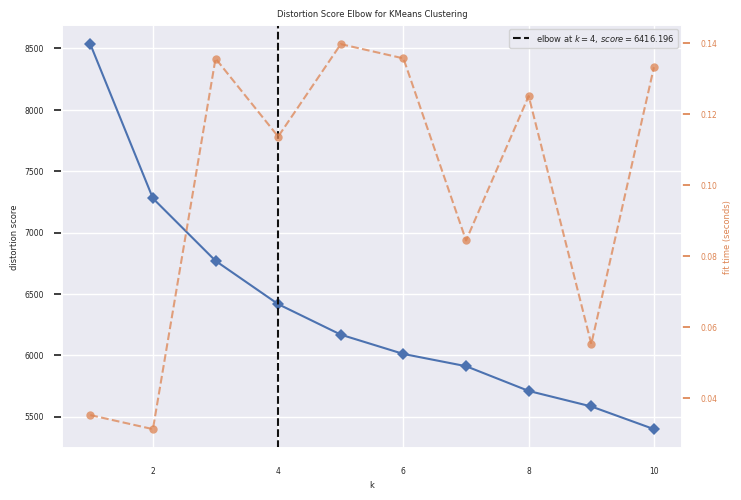

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [197]:
vis = KElbowVisualizer(KMeans(random_state=0, n_init='auto'), k=(1,11))

vis.fit(employed_pca_df)
vis.show()

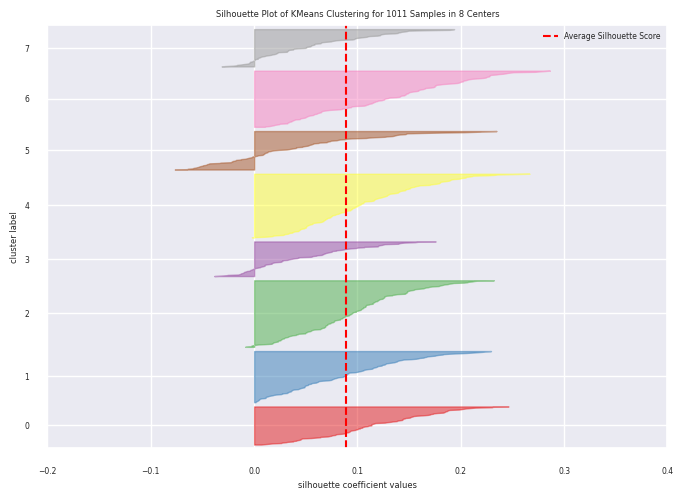

0.08935846279993988


In [208]:
kmeans = KMeans(n_clusters=8, n_init='auto')

silh_vis = SilhouetteVisualizer(kmeans)
silh_vis.fit(employed_pca_df)
silh_vis.show()

print(silhouette_score(employed_pca_df, kmeans.labels_))

In [199]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='spherical', init_params='k-means++')

gmm_labels = gmm.fit_predict(employed_pca_df)

print(silhouette_score(employed_pca_df, gmm_labels))

0.1084844722064742


In [202]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4, metric='cityblock', linkage='average')

agg_labels = agg.fit_predict(employed_pca_df)
print(silhouette_score(employed_pca_df, agg_labels))

0.07758041583978684
